# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [66]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<h3>Significance vs Chance</h3>

Our goal is to determine if the cultural implications of a name effects the outcome of a call back from a resume. To do this we will use a Statistical method called a Hypothesis Test where we assume a null hypothesis and either accept or reject it depending on the level of evidence. 

The probability of a resume getting accepted depending on the implied race will be modeled as a Bernoulli Distribution. In this case the null hypothesis will be that there is no difference between the distributions of implied white names and implied black names. We will consider the data gathered as samples and use them to model a sample distribution based off of the difference in sample means. 

We will employ two differing tests below which will be explained in more detail.

In [62]:
w = data[data.race=='w']
b = data[data.race=='b']
diff = w['call'].mean() - b['call'].mean()
alpha = .05

<h4>Bootstrap Permutations</h4>

For the first test we use a very simple approach and assume that the difference in mean is due to an unlucky permutation of the resumes. We take 100,000 random permutations and calculate the probability that there the mean difference is as large as in our original sample. We find that this probability is very close to zero so we reject the null hypothesis and accept that there is a difference between the distributions for white name and black name resume call backs.

In [63]:
np.random.seed(36252)

sample_diffs = []
for i in range(100000):
    sample = np.random.permutation(data['call'])
    w_sample = sample[:len(w)]
    b_sample = sample[len(w):]
    sample_diffs.append(w_sample.mean() - b_sample.mean())

df_diffs = pd.Series(sample_diffs)
p_value = len(df_diffs[df_diffs > diff])/len(sample_diffs)

print("")
print("Alpha: " + str(alpha))
print("Sample Difference p-value: " + str(p_value))
print("")


Alpha: 0.05
Sample Difference p-value: 2e-05



<h4>Frequentist Approach</h4>

Next we test using our theoretical understanding of probability distributions to analytically determine the probability of our observed outcome occurring given the null hypothesis. So by assuming that the black and white samples came from the same distribution we can estimate the variance of that distribution using the total collection of our data. Then we can derive the standard deviation of the difference of two sample distributions, the mean is 0 because the samples are assumed to come from the same distirbution. We then calculate the probability that the difference was as large as the difference we observed using the analytrical methods of z-score calculation. A Normal distribution is assumed here because the sample is large and independently assigned.

Below we observe an extremely low probability forcing us to reject the null hypothesis once again. In fact it turns out that the permutation method is actually an empirical version of the same exact test and produce nearly identical results shown below in the p-values and sample difference distribution graphs.

In [71]:
diff_std = np.sqrt(((data['call'].std() ** 2) / len(w)) + ((data['call'].std() ** 2) / len(b)))
z_score = diff / diff_std
stat_p_value = round(scipy.stats.norm.sf(z_score), 6)

print("")
print("Alpha: " + str(alpha))
print("Theoretical Difference p-value: " + str(stat_p_value))
print("")


Alpha: 0.05
Theoretical Difference p-value: 2e-05



Text(0.5,1,'Sample Mean Difference Probability Distribution')

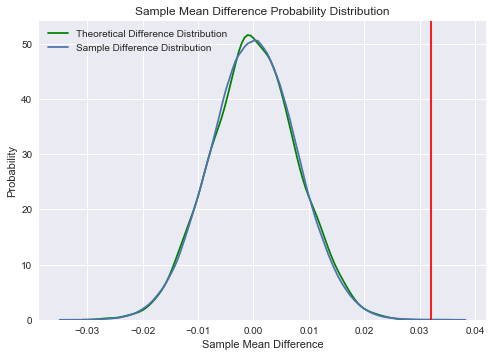

In [73]:
np.random.seed(36255443)
norm_samples = np.random.normal(0, diff_std, size=10000)
sns.kdeplot(norm_samples, label='Theoretical Difference Distribution', color='green')

sns.kdeplot(sample_diffs, bw=.00099, label='Sample Difference Distribution')
plt.axvline(x=diff, c='red')

plt.xlabel('Sample Mean Difference')
plt.ylabel('Probability')
plt.title('Sample Mean Difference Probability Distribution')

<h4>Race Matters</h4>

In the above analysis we saw that by simply changing the name on a potential employee's resume from a common white name to a common black name there was a negative 3% change in call backs. From a statistical perspective the chance of a discrepency this large occurring by chance alone is extremely low, less than 1%. This means that whether intentionally or subconciously the name of the person on the resume is being accounted for and effecting the decision of the employers. The impact of the name relative to other aspects of the resume has yet to be investigated, but hopefully is minor in contrast to factors such as work experience or skill set. In order to analyze this we could generate confidence intervals around the percentage of impact for whatever aspects we are interested in.